<a href="https://colab.research.google.com/github/PranavR-2001/Simple_Convolution_Image_Classifier/blob/main/Simple_convolution_image_classifier_dogs_and_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple convolution network to classify images of dogs and cats

Make sure to change the runtime of your notebook to **GPU** . For that go to **Runtime** -> **Change runtime type** -> **GPU** from the dropdown and **Save** 

You are going to need a GPU so that the training process can go faster than when running on a CPU

## Install kaggle and download dataset

In [ ]:
!pip install -q kaggle

Check the readme.md file to know more about how to get the kaggle token

In [ ]:
# upload the kaggle token file from local device
from google.colab import files
files.upload()

In [ ]:
# make kaggle directory
! mkdir ~/.kaggle


In [ ]:
# copy file into folder
! cp kaggle.json ~/.kaggle/


In [ ]:
# change permission
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# check for datasets
! kaggle datasets list -s [dogs]


ref                                                        title                                                size  lastUpdated          downloadCount  
---------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
jessicali9530/stanford-dogs-dataset                        Stanford Dogs Dataset                               750MB  2019-11-13 06:20:35          19910  
chetankv/dogs-cats-images                                  Dogs & Cats Images                                  435MB  2018-04-19 18:20:08          22094  
mmoreaux/audio-cats-and-dogs                               Audio Cats and Dogs                                  97MB  2017-10-05 09:40:26           7047  
shaunthesheep/microsoft-catsvsdogs-dataset                 Cats-vs-Dogs                                        788MB  2020-03-12 05:34:30           3067  
d4rklucif3r/cat-and-dogs                                   Cat & Dogs 

In [ ]:
# download dataset
!kaggle datasets download -d chetankv/dogs-cats-images


 99% 432M/435M [00:04<00:00, 40.5MB/s]
100% 435M/435M [00:04<00:00, 103MB/s] 


In [ ]:
# unzip the zip file to get the dataset
import zipfile

zip_ref = zipfile.ZipFile("dogs-cats-images.zip")
zip_ref.extractall()
zip_ref.close()

## Studying the data

In [ ]:
# walk through the folder to know the content
import pathlib
import os

for dirpath, dirnames, filenames in os.walk("dog vs cat"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 1 directories and 0 images in dog vs cat
There are 2 directories and 0 images in dog vs cat/dataset
There are 2 directories and 0 images in dog vs cat/dataset/training_set
There are 0 directories and 4000 images in dog vs cat/dataset/training_set/dogs
There are 0 directories and 4000 images in dog vs cat/dataset/training_set/cats
There are 2 directories and 0 images in dog vs cat/dataset/test_set
There are 0 directories and 1000 images in dog vs cat/dataset/test_set/dogs
There are 0 directories and 1000 images in dog vs cat/dataset/test_set/cats


In [ ]:
# get the names of the classes ie, cats and dogs 
import numpy as np

data_dir = pathlib.Path("dog vs cat/dataset/training_set")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['cats' 'dogs']


In [ ]:
# visualizing the data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# create a function to show random image from dataset
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  print(target_folder)

  random_image = random.sample(os.listdir(target_folder), 1)

  # plot image using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.axis(False)
  plt.title(target_class)
  print(f"Image shape: {img.shape}")


dog vs cat/dataset/training_set/cats
Image shape: (280, 300, 3)


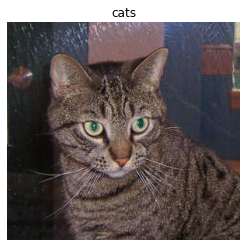

In [ ]:
# view a random image form training_set
view_random_image("dog vs cat/dataset/training_set/", "cats")

# Model-1 without data augmentation

## preprocess the data

In [ ]:
import tensorflow as tf


In [ ]:

# take the images from each directory and make them into batches
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# get the directory path
train_dir = "dog vs cat/dataset/training_set"
test_dir = "dog vs cat/dataset/test_set"

# Create instances for training and test data
train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)

# create the test and train data
train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               target_size = (224,224),
                                               batch_size= 32,
                                               class_mode = 'binary',
                                               seed = 42)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            seed = 42)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Create the model_1

In [ ]:
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation= 'relu', input_shape = (224,224,3)),
  tf.keras.layers.Conv2D(10,3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10,3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
250/250 [==============================] - 70s 161ms/step - loss: 0.6470 - accuracy: 0.6024 - val_loss: 0.5963 - val_accuracy: 0.6700
Epoch 2/5
250/250 [==============================] - 40s 159ms/step - loss: 0.5680 - accuracy: 0.7045 - val_loss: 0.5818 - val_accuracy: 0.6960
Epoch 3/5
250/250 [==============================] - 39s 156ms/step - loss: 0.5074 - accuracy: 0.7559 - val_loss: 0.6660 - val_accuracy: 0.6430
Epoch 4/5
250/250 [==============================] - 39s 156ms/step - loss: 0.4646 - accuracy: 0.7812 - val_loss: 0.5925 - val_accuracy: 0.7035
Epoch 5/5
250/250 [==============================] - 39s 157ms/step - loss: 0.3892 - accuracy: 0.8227 - val_loss: 0.6184 - val_accuracy: 0.7010


## See the results visually

In [ ]:
# Create a function to plot loss curves
def plot_loss_curves(history):
  loss = history.history['loss']
  accuracy = history.history['accuracy']
  val_loss = history.history['val_loss']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot the graphs
  plt.plot(epochs,loss, label = 'training_loss' )
  plt.plot(epochs,val_loss, label = 'validation_loss' )
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend();

  plt.figure()
  plt.plot(epochs,accuracy, label = 'training_accuracy' )
  plt.plot(epochs,val_accuracy, label = 'validation_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend();

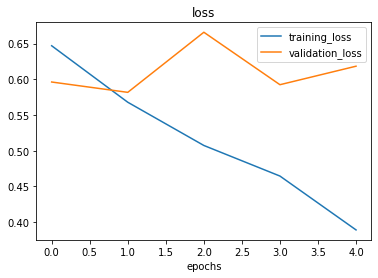

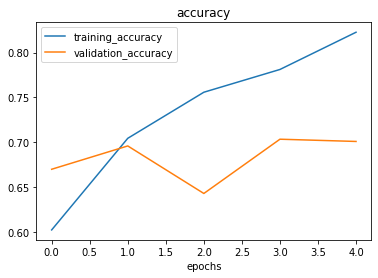

In [ ]:
# plot the curves of model_1
plot_loss_curves(history_1)

Here we can see from the graph that the model is **overfitting**, ie. the model is learning the training data too much that is cannot understand the unseen test data properly.


To solve the problem of overfitting we can do the following method:


*   Decrease the complexity of the model
*   Add more data
*   Use data augmentation
*   Add regularization





# model_2 with data augmentation

## preprocess the data

In [ ]:
# create data augmentation using ImageDataGenerator

train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range = 0.2,
                                       width_shift_range = 0.2,
                                       height_shift_range = 0.2,
                                       shear_range = 0.2,
                                       zoom_range = 0.2)

# we dont need to do data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

# Create dataset
train_data_aug = train_datagen_aug.flow_from_directory(directory = train_dir,
                                                       target_size = (224,224),
                                                       class_mode = 'binary',
                                                       batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Create the model_2

In [ ]:
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation= 'relu', input_shape = (224,224,3)),
  tf.keras.layers.Conv2D(10,3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10,3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# fit the model
# you may want to reduce the number of epochs, as 20 epochs may take a lot of time. 5 or 10 can also work
history_2 = model_2.fit(train_data_aug,
                        epochs = 20,
                        steps_per_epoch = len(train_data_aug),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/20
250/250 [==============================] - 123s 489ms/step - loss: 0.6849 - accuracy: 0.5502 - val_loss: 0.6565 - val_accuracy: 0.6095
Epoch 2/20
250/250 [==============================] - 120s 480ms/step - loss: 0.6525 - accuracy: 0.6169 - val_loss: 0.6269 - val_accuracy: 0.6460
Epoch 3/20
250/250 [==============================] - 119s 476ms/step - loss: 0.6227 - accuracy: 0.6518 - val_loss: 0.6343 - val_accuracy: 0.6370
Epoch 4/20
250/250 [==============================] - 120s 478ms/step - loss: 0.6073 - accuracy: 0.6674 - val_loss: 0.6026 - val_accuracy: 0.6795
Epoch 5/20
250/250 [==============================] - 122s 487ms/step - loss: 0.5870 - accuracy: 0.6909 - val_loss: 0.6373 - val_accuracy: 0.6405
Epoch 6/20
250/250 [==============================] - 124s 494ms/step - loss: 0.5746 - accuracy: 0.6977 - val_loss: 0.5790 - val_accuracy: 0.7100
Epoch 7/20
250/250 [==============================] - 123s 490ms/step - loss: 0.5735 - accuracy: 0.6971 - val_loss: 0.5355 -

Yes, the model took too long to train. This is because we used **data augmentation**. Data augmentation using the ImageDataGenerator is done during the training process of the model. That is why it takes longer. It is done on the go.


You can modify the model by :

*  Changing the model architecture ( make it more simple or complex. Try it )
*  Run it for more or less epochs ( Maybe after modifying the model, it make give more accuracy with less epochs )
*  Change the learning rate and so on....

## See the results

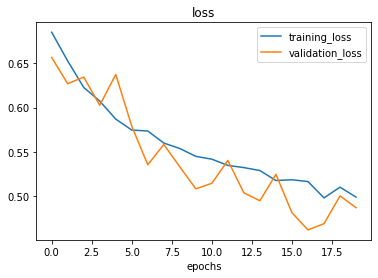

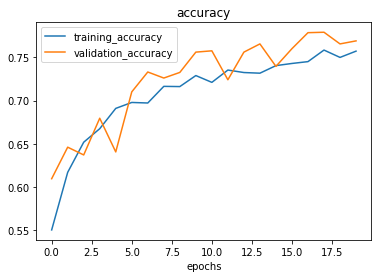

In [ ]:
# plot loss curves
plot_loss_curves(history_2)

In [ ]:
# evaluate the model
model_2.evaluate(test_data)

63/63 [==============================] - 8s 122ms/step - loss: 0.4871 - accuracy: 0.7690


[0.4871349632740021, 0.7689999938011169]

# make prediction

In [ ]:
# Create a function to get a new image and predict class
def pred_and_plot(model, filename, image_shape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels= 3)
  img = tf.image.resize(img, size = [image_shape, image_shape])
  img = img/255.

  # make prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # get the predicted class name
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # plot the image with the prediction
  plt.imshow(img)
  plt.title(f"Predicted class :: {pred_class} || prediction result : {pred[0][0]:.4f}")
  plt.axis(False)

The prediction result here means that, if the number is closer to 0 then the model predicted the image as a **cat** and if it is closer to 1 then the model predicted the image as a **dog**

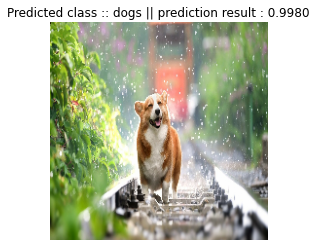

In [ ]:
# make some prediction. Add image from local device
pred_and_plot(model_2, "doggy.jpg")